# Preparing data

In [1]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import random
from sklearn.model_selection import cross_val_score

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Categories = ['Bean', 'Broccoli', 'Cabbage', 'Papaya', 'Tomato']
flat_data_arr = []  # input array
target_arr = []  # output array
datadir = '/content/drive/My Drive/Project-Data-Science/Vegetable Images/train'

# Path which contains all the categories of images
for category in Categories:
    print(f'Loading category: {category}')
    path = os.path.join(datadir, category)
    files = os.listdir(path)
    num_images_to_load = min(len(files), 300)  # Maximum 300 images per category
    selected_files = files[:num_images_to_load]
    for img in selected_files:
        img_array = imread(os.path.join(path, img))
        img_resized = resize(img_array, (150, 150, 3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(category))
    print(f'Loaded category: {category} successfully')

flat_data = np.array(flat_data_arr)
target = np.array(target_arr)

print("Shape of flat_data:", flat_data.shape)
print("Shape of target:", target.shape)

Loading category: Bean
Loaded category: Bean successfully
Loading category: Broccoli
Loaded category: Broccoli successfully
Loading category: Cabbage
Loaded category: Cabbage successfully
Loading category: Papaya
Loaded category: Papaya successfully
Loading category: Tomato
Loaded category: Tomato successfully
Shape of flat_data: (1500, 67500)
Shape of target: (1500,)


In [4]:
#dataframe
df=pd.DataFrame(flat_data)
df['Target']=target
df.shape

(1500, 67501)

In [5]:
#input data
x=df.iloc[:,:-1]
#output data
y=df.iloc[:,-1]

# Model Selection

In [6]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.20, random_state=77, stratify=y)

# classification with K-NN

In [7]:
# Create K-NN classifier with n_neighbors=3
model_knn = KNeighborsClassifier(n_neighbors=3)
# Fit the K-NN classifier to the training set
model_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
#Predicting the test set result
y_pred= model_knn.predict(x_test)

In [9]:
#Creating the Confusion matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[39, 11,  3,  2,  5],
       [18, 38,  3,  1,  0],
       [14,  3, 40,  2,  1],
       [ 2,  5,  1, 52,  0],
       [29,  5,  6,  0, 20]])

Text(0.5, 1.0, 'Confusion Matrix')

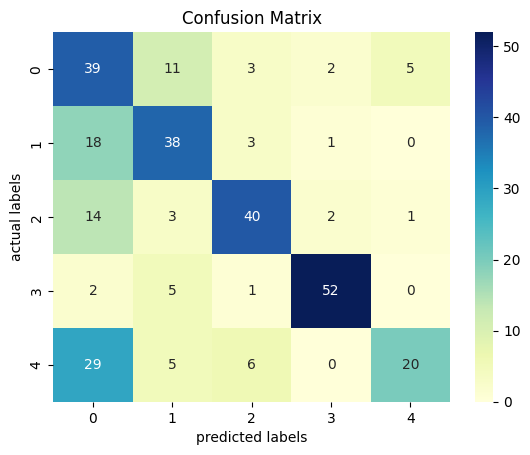

<Figure size 800x800 with 0 Axes>

In [10]:
#แสดง Confusion Matrix ในรูปแบบ Graphic
ax = plt.subplot()
plt.rcParams['figure.figsize'] = 20,20
sns.heatmap(cm,annot=True, ax=ax, cmap="YlGnBu")

y = range(0,40)
plt.figure(figsize=(8, 8))
ax.set_xlabel("predicted labels")
ax.set_ylabel("actual labels")
ax.set_title("Confusion Matrix")


In [11]:
# Compute the accuracy
from sklearn.metrics import accuracy_score
print("%.2f" % (accuracy_score(y_test, y_pred)*100))

63.00


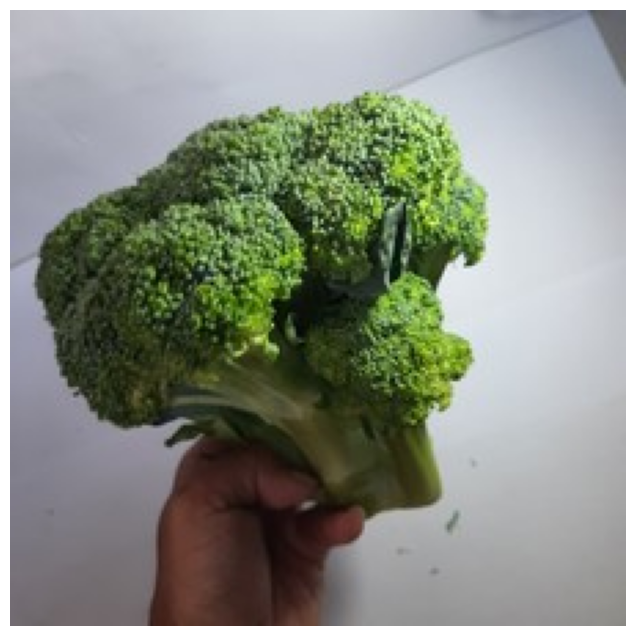

Bean = 0.00%
Broccoli = 66.67%
Cabbage = 0.00%
Papaya = 33.33%
Tomato = 0.00%
The predicted image is : Broccoli


In [13]:
# Define the path to the test folders
test_folders_path = '/content/drive/My Drive/Project-Data-Science/Vegetable Images/test'
# List all subfolders in the test folder
subfolders = [f.path for f in os.scandir(test_folders_path) if f.is_dir()]
# Select a random subfolder
random_folder_path = random.choice(subfolders)
# List all files in the random subfolder
file_list = os.listdir(random_folder_path)
# Select a random file from the list
random_file = random.choice(file_list)
# Define the path to the randomly selected image
path = os.path.join(random_folder_path, random_file)
plt.figure(figsize=(8, 8))
# Read the image
img = imread(path)
# Display the image
plt.imshow(img)
plt.axis('off')
plt.show()
# Resize the image
img_resize = resize(img, (150, 150, 3))
# Flatten the resized image
l = [img_resize.flatten()]
# Make predictions using the K-NN model
probability = model_knn.predict_proba(l)
# Display the predicted probabilities
for ind, val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100:.2f}%')
# Display the predicted image category
print("The predicted image is : " + Categories[model_knn.predict(l)[0]])

# Cross validation

In [14]:
# Assuming X_train, y_train are your training data and labels
knn = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(knn, x_train, y_train, cv=5)  # 5-fold cross-validation
# Print the mean and standard deviation of the scores
print("Mean cross-validation score: {:.2f}".format(np.mean(scores)))
print("Standard deviation of cross-validation score: {:.2f}".format(np.std(scores)))

Mean cross-validation score: 0.59
Standard deviation of cross-validation score: 0.02


# classification with SVM

In [15]:
model_svm = svm.SVC(probability=True)
#gamma=0.001
# Defining the parameters grid for GridSearchCV
#param_grid={'C':[0.1,1,10,100],
            #'gamma':[0.0001,0.001,0.1,1],
            #'kernel':['rbf','poly']}
# Creating a support vector classifier
#svc=svm.SVC(probability=True)
# Creating a model using GridSearchCV with the parameters grid
#model=GridSearchCV(svc,param_grid)

In [16]:
# Training the model using the training data
model_svm.fit(x_train,y_train)

SVC(probability=True)

# Model Evaluation

In [17]:
# Testing the model using the testing data
y_pred = model_svm.predict(x_test)
# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)
# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")

The model is 82.66666666666667% accurate


In [18]:
print(classification_report(y_test, y_pred, target_names=['Bean', 'Broccoli', 'Cabbage', 'Papaya', 'Tomato']))

              precision    recall  f1-score   support

        Bean       0.73      0.73      0.73        60
    Broccoli       0.74      0.85      0.79        60
     Cabbage       0.85      0.73      0.79        60
      Papaya       0.93      0.93      0.93        60
      Tomato       0.90      0.88      0.89        60

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



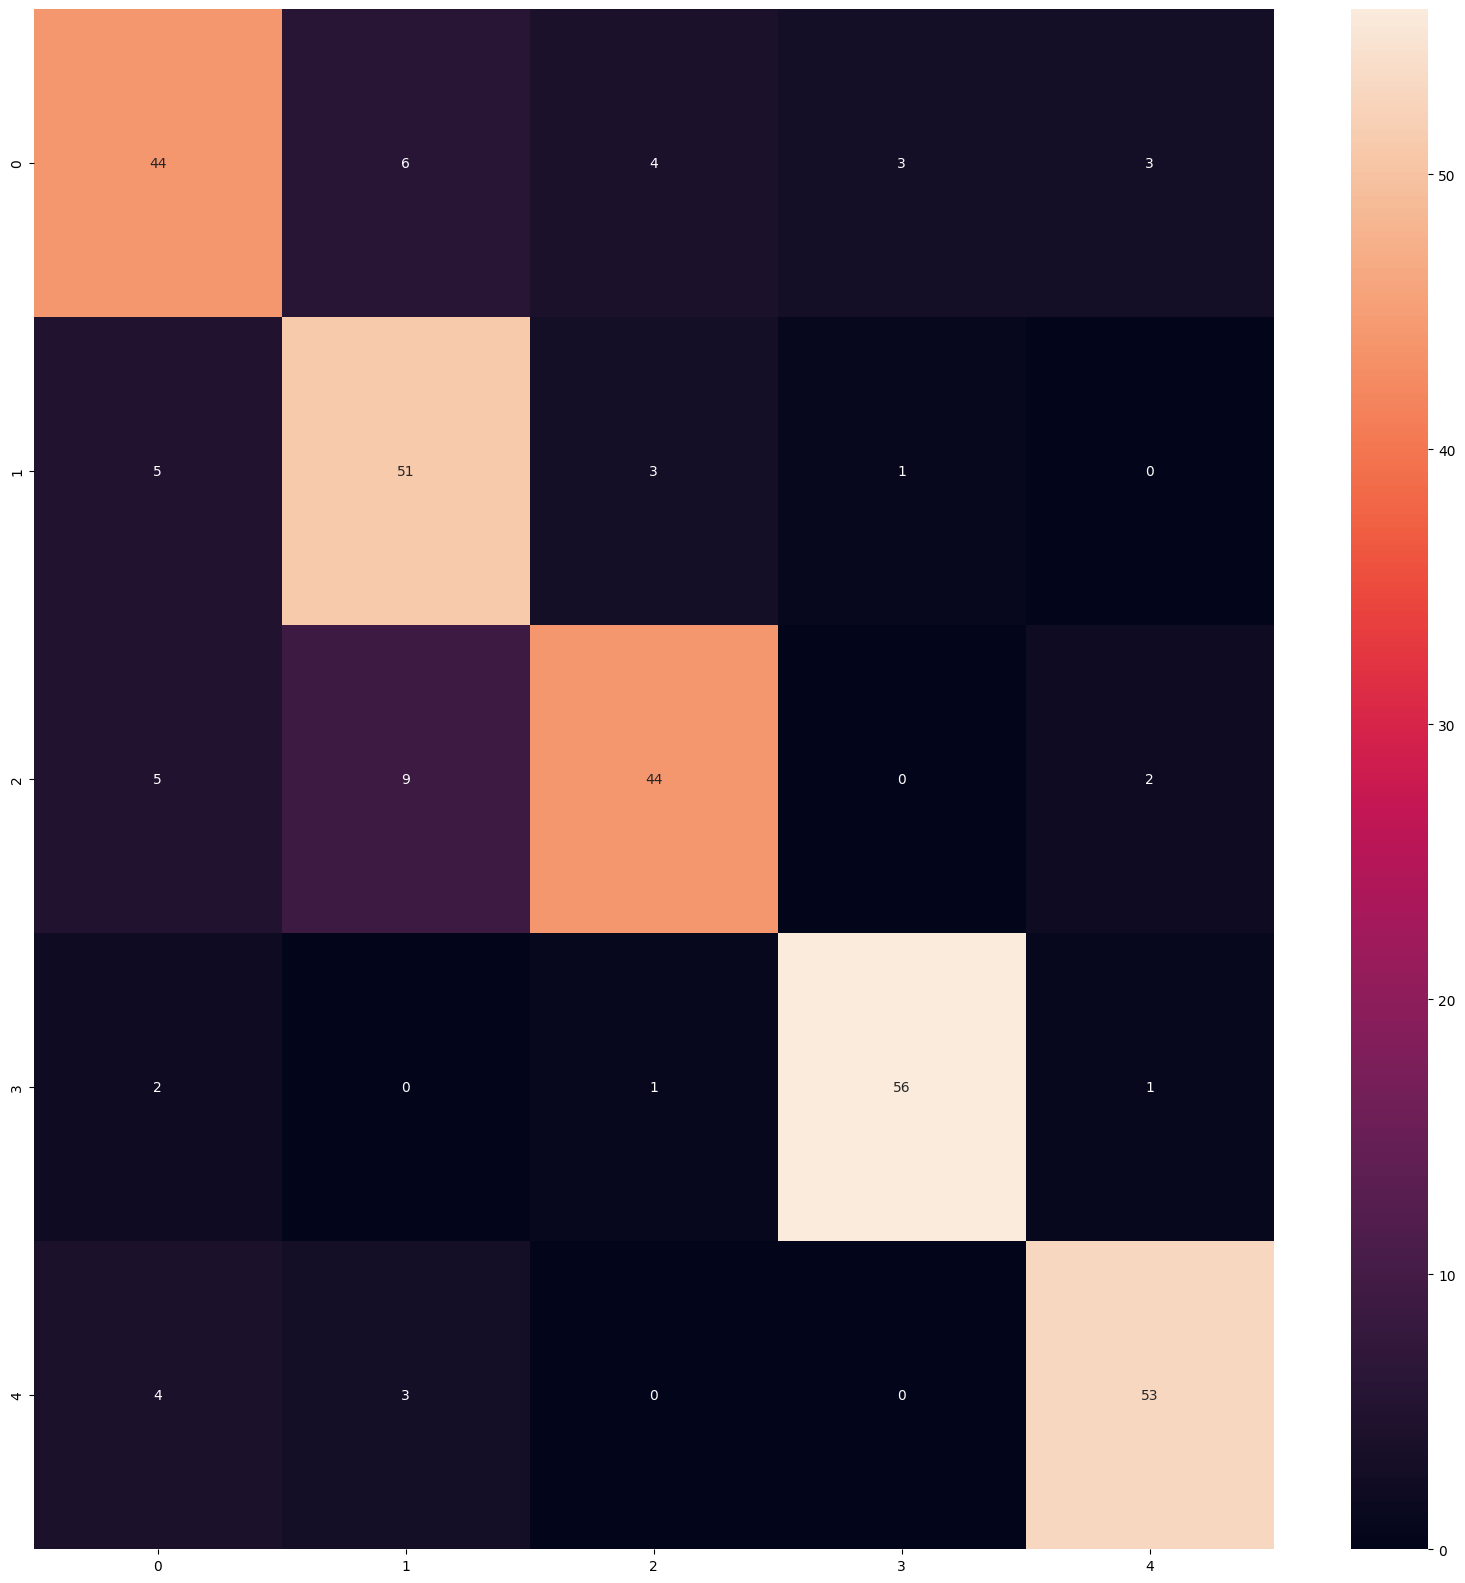

In [21]:
#confusion_matrix แสดงผลลัพธ์ว่าในแต่คลาส ทำนายถูกต้องเท่าไหร่ ทำนายผิดเท่าไหร่ และทำนายผิดไปอยู่คลาสใดบ้าง
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)
plt.show()

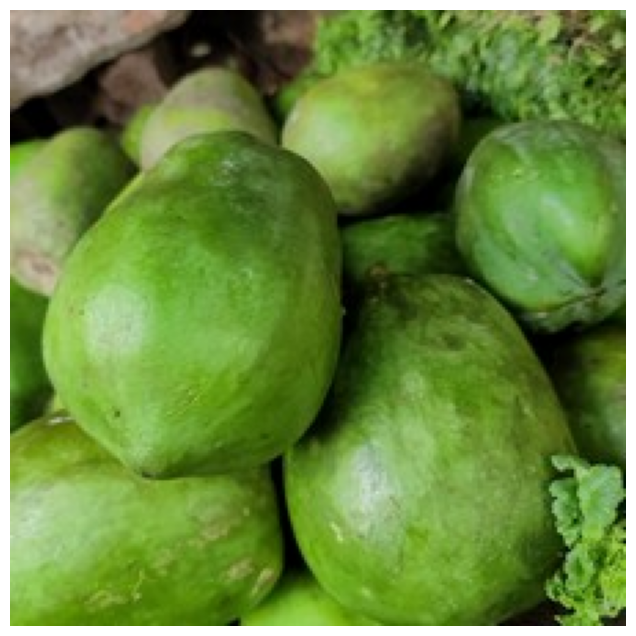

Bean = 8.71%
Broccoli = 0.17%
Cabbage = 0.68%
Papaya = 90.42%
Tomato = 0.02%
The predicted image is : Papaya


In [23]:
# Path to the folder containing test images
test_folder_path = "/content/drive/My Drive/Project-Data-Science/Vegetable Images/test"
# List all subfolders in the test folder
subfolders = [f.path for f in os.scandir(test_folder_path) if f.is_dir()]
# Select a random subfolder
random_folder_path = random.choice(subfolders)
# List all files in the random subfolder
file_list = os.listdir(random_folder_path)
# Select a random file from the list
random_file = random.choice(file_list)
# Define the path to the randomly selected image
path = os.path.join(random_folder_path, random_file)
plt.figure(figsize=(8, 8))
img = imread(path)
plt.imshow(img)
plt.axis('off')
plt.show()
# Resize and flatten the image for prediction
img_resize = resize(img, (150, 150, 3))
l = [img_resize.flatten()]
# Predict the class probabilities and the predicted class
probability = model_svm.predict_proba(l)
for ind, val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100:.2f}%')
predicted_class = Categories[model_svm.predict(l)[0]]
print("The predicted image is : " + predicted_class)

# Cross Validation

In [24]:
# Define candidate kernels and regularization parameters
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
C = [0.01, 0.1, 1, 10]

for k in kernels:
    for c in C:
        model = svm.SVC(kernel=k, C=c)
        cvs = cross_val_score(model, x_train, y_train, cv=5)
        print(cvs.mean().round(4), end=' ')
    print('\n')

0.7358 0.7358 0.7358 0.7358 

0.5958 0.6067 0.7942 0.8417 

0.6942 0.7742 0.7775 0.7775 

0.2225 0.2225 0.2083 0.1358 



# Deploy Model

In [29]:
import pickle

# Assuming model is your trained SVM model
svm_model = svm.SVC(kernel='rbf', probability=True, C=10)
svm_model.fit(x_train, y_train)

# Save the model to a file
model_filename = "svm_model.pickle"
with open(model_filename, 'wb') as model_file:
    pickle.dump(svm_model, model_file)

In [30]:
import pickle

# Load the model from a file
model_filename = "svm_model.pickle"
with open(model_filename, 'rb') as model_file:
    svm_model = pickle.load(model_file)

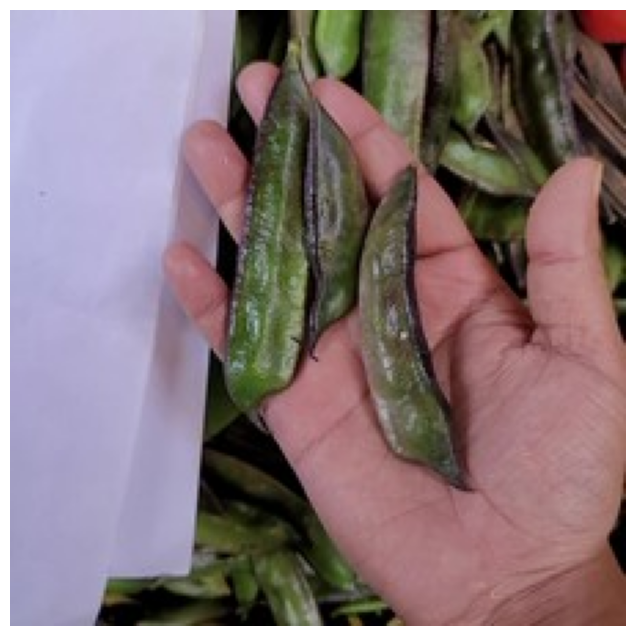

Bean = 79.43%
Broccoli = 4.09%
Cabbage = 5.30%
Papaya = 0.07%
Tomato = 11.11%
The predicted image is : Bean


In [36]:
# Path to the folder containing test images
test_folder_path = "/content/drive/My Drive/Project-Data-Science/Vegetable Images/test"

# List all subfolders in the test folder
subfolders = [f.path for f in os.scandir(test_folder_path) if f.is_dir()]

# Select a random subfolder
random_folder_path = random.choice(subfolders)

# List all files in the random subfolder
file_list = os.listdir(random_folder_path)

# Select a random file from the list
random_file = random.choice(file_list)

# Define the path to the randomly selected image
path = os.path.join(random_folder_path, random_file)

plt.figure(figsize=(8, 8))
img = imread(path)
plt.imshow(img)
plt.axis('off')
plt.show()

# Resize and flatten the image for prediction
img_resize = resize(img, (150, 150, 3))
l = [img_resize.flatten()]

# Predict the class probabilities and the predicted class
probability = svm_model.predict_proba(l)
Categories = ['Bean', 'Broccoli', 'Cabbage', 'Papaya', 'Tomato']
for ind, val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100:.2f}%')
predicted_class = Categories[svm_model.predict(l)[0]]
print("The predicted image is : " + predicted_class)